In [1]:
from langchain_ollama import ChatOllama

In [19]:
# llm1 = ChatOllama(model="krith/meta-llama-3.1-8b-instruct:IQ2_M")
llm2 = ChatOllama(model="llama3.2:1b")

In [10]:
llm2.invoke("hello").content

'Hello. Is there something I can help you with or would you like to chat?'

In [14]:
# Zero Shot Prompting
prompt = """Classify the following text as either positive, negative, or neutral: 'I had a great time at the concert, the music was amazing and the atmosphere was perfect!"""
print(llm2.invoke(prompt).content)

content='I would classify the text as positive. The sentence expresses enthusiastic praise for the event, using words like "great," "amazing," and "perfect" to convey a positive sentiment. There are no negative or neutral language choices in this sentence.' additional_kwargs={} response_metadata={'model': 'llama3.2:1b', 'created_at': '2024-11-20T06:57:51.2770797Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 2838921300, 'load_duration': 24295200, 'prompt_eval_count': 59, 'prompt_eval_duration': 59969000, 'eval_count': 50, 'eval_duration': 2752960000} id='run-0d6d899e-b58d-48b4-b77f-d4428daf6fd0-0' usage_metadata={'input_tokens': 59, 'output_tokens': 50, 'total_tokens': 109}


In [12]:
# Few Shot Prompting
prompt = """
Classify the as either positive, negative, or neutral, following the example

Example 1: "I love this new phone! It's so fast and the camera quality is amazing." → Positive
Example 2: "The service at the restaurant was terrible, and the food was cold." → Negative
Example 3: "The movie was okay, not great but not bad either." → Neutral

Now, classify the following text: 'I had a great time at the concert, the music was amazing and the atmosphere was perfect!'
"""
print(llm2.invoke(prompt).content)

Based on the examples provided:

- "I love this new phone! It's so fast and the camera quality is amazing."

*   Positive: The adjectives used are positive ("fast", "amazing") to describe the phone.

- "The service at the restaurant was terrible, and the food was cold."

*   Negative: The adjectives used are negative ("terrible", "cold") to describe the service.

- "The movie was okay, not great but not bad either."

*   Neutral: The adjectives used here are neutral ("okay"), indicating no strong positive or negative emotion towards the movie.

- 'I had a great time at the concert, the music was amazing and the atmosphere was perfect!'

*   Positive: The adjectives used ("great", "amazing") to describe the time spent at the concert.


In [15]:
prompt = """
Classify the as either positive, negative, or neutral, following the example

Example 1: "I love this new phone! It's so fast and the camera quality is amazing." → Positive
Example 2: "The service at the restaurant was terrible, and the food was cold." → Negative
Example 3: "The movie was okay, not great but not bad either." → Neutral

Please return the result as a JSON object with the structure:
{
    "text": "<the text>",
    "sentiment": "<Positive/Negative/Neutral>"
}

Now, classify the following text: 'I had a great time at the concert, the music was amazing and the atmosphere was perfect!'
"""

# Assuming `llm.invoke` works as expected
response = llm2.invoke(prompt).content
print(response)

{
  "text": "I had a great time at the concert, the music was amazing and the atmosphere was perfect!",
  "sentiment": "Positive"
}


In [21]:
# Chain of Thought
prompt = """
Let's solve the problem step by step:
Example : What is 12 multiplied by 8?

First, break down the problem: 
12 times 8 is the same as (10 + 2) times 8.
Now, calculate each part:
10 times 8 = 80
2 times 8 = 16
Finally, add 80 and 16: 80 + 16 = 96.

Therefore, the answer is 96.

Question : What is 11 multiple by 9
"""

print(llm2.invoke(prompt).content)

To solve this problem, let's break it down step by step:

11 multiplied by 9 can be written as (10 + 1) times 9.
Now, calculate each part:
10 times 9 = 90
1 times 9 = 9
Finally, add 90 and 9: 90 + 9 = 99.

Therefore, the answer is 99.


In [49]:
# Chain of Thought
prompt = """
Let's solve the problem step by step:
Example : What is 12 multiplied by 8?

First, break down the problem: 
12 times 8 is the same as (10 + 2) times 8.
Now, calculate each part:
10 times 8 = 80
2 times 8 = 16
Finally, add 80 and 16: 80 + 16 = 96.

Therefore, the answer is 96.

Question : What is 11 multiple by 9
"""

print(llm2.invoke(prompt).content)

I'm happy to help you solve the problem step by step.

Let's break down the problem:

11 multiplied by 9 is the same as (10 + 1) times 9.

Now, calculate each part:
10 times 9 = 90
1 times 9 = 9

Finally, add 90 and 9: 90 + 9 = 99.

Therefore, the answer is 99.


In [22]:
# Function Calling

def add(a: int, b: int) -> int:
    """Add two integers.

    Args:
        a: First integer
        b: Second integer
    """
    return a + b


def multiply(a: int, b: int) -> int:
    """Multiply two integers.

    Args:
        a: First integer
        b: Second integer
    """
    return a * b

tools = [add,multiply]
llm_with_tools = llm2.bind_tools(tools)

In [23]:
prompt = "What is 11 multiple by 9"
print(llm2.invoke(prompt).content)
print(llm_with_tools.invoke(prompt).response_metadata)

To find the result, I'll multiply 11 by 9.

11 * 9 = 99
{'model': 'llama3.2:1b', 'created_at': '2024-11-20T07:04:12.06407Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'multiply', 'arguments': {'a': '11', 'b': '9'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 5132525600, 'load_duration': 29390900, 'prompt_eval_count': 226, 'prompt_eval_duration': 3751362000, 'eval_count': 22, 'eval_duration': 1349077000}


In [24]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema import StrOutputParser

prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You're a very knowledgeble historian.",
            ),
            ("human", "{question}"),
        ]
    )
    
model = ChatOllama(model="llama3.2:1b", temparature = 1)
chain = prompt | model | StrOutputParser()

prompt = "Who is Indonesia 1st President ?"
chain.invoke(prompt)

"Indonesia's first president was Sukarno (also known as Soekarno). He served as the country's head of state and government from August 17, 1945, to December 27, 1967. Sukarno was a key figure in Indonesia's struggle for independence from Dutch colonial rule, and he played a significant role in shaping the country's early years.\n\nSukarno was born on September 6, 1893, in Banyuwangi, East Java, Indonesia. He studied law at the University of Amsterdam before returning to Indonesia and becoming involved in the independence movement. In 1945, Sukarno declared Indonesia's independence from the Netherlands, and he became the country's first president.\n\nUnder Sukarno's leadership, Indonesia experienced a period of rapid modernization and economic growth, but it also faced challenges such as social unrest, ethnic conflicts, and external pressures from other countries. Sukarno died on December 27, 1970, due to complications from heart disease.\n\nSukarno's presidency was marked by his advoca

In [25]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema import StrOutputParser

prompt = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                "You're a very knowledgeble historian.",
            ),
            ("human", "{question}"),
        ]
    )
    
model = ChatOllama(model="llama3.2:1b", temparature = 0)
chain = prompt | model | StrOutputParser()

prompt = "Who is Indonesia 1st President ?"
chain.invoke(prompt)

"Indonesia's first president was Soekarno (also spelled Sukarno). He served as the country's first president from August 17, 1945, until his death on October 27, 1970. Soekarno was a key figure in Indonesia's struggle for independence from Dutch colonial rule and played a leading role in shaping the country's early years.\n\nSoekarno was born in 1901 in Mojokerto, East Java, and rose to prominence as a lawyer and politician. He co-founded the Indonesian National Revolution (Gerakan Pembebasan Nasional) with Hatta in 1927, which aimed to challenge Dutch colonial rule in Indonesia.\n\nIn 1945, Soekarno became the country's first head of state after the collapse of the Dutch East Indies. He played a crucial role in establishing the Indonesian Republic and was a key figure in drafting the country's constitution and national anthem.\n\nSoekarno served as president from August 17, 1945, until his death in 1970. He was succeeded by Suharto, who ruled Indonesia as President of Indonesia from 1

In [31]:
# Langgraph 

import operator
from typing import TypedDict
from typing_extensions import Annotated
from langgraph.graph import StateGraph, END


# Define our state
class State(TypedDict):
    messages: Annotated[list, operator.add]
    location: str
    weather: str


# Create our graph
workflow = StateGraph(State)


# Define our nodes
def greet(state):
    return {"messages": [("ai", "Hello! I'm your weather assistant. Where are you located?")]}


def get_location(state):
    # getting the location from gmap
    return {"location": "tokyo"}


def check_weather(state):
    # In a real app, we'd call a weather API here

    weather = "sunny" if "tokyo" in state["location"].lower() else "rainy"
    return {"weather": weather}


def report_weather(state):
    return {"messages": [
        ("ai", f"The weather in {state['location']} is {state['weather']}. Can I help you with anything else?")]}


# Add nodes to our graph
workflow.add_node("greet", greet)
workflow.add_node("get_location", get_location)
workflow.add_node("check_weather", check_weather)
workflow.add_node("report_weather", report_weather)

# Connect our nodes
workflow.set_entry_point("greet")
workflow.add_edge("greet", "get_location")
workflow.add_edge("get_location", "check_weather")
workflow.add_edge("check_weather", "report_weather")
workflow.add_edge("report_weather", END)

# Compile our graph
app = workflow.compile()

# Run our app
inputs = {"messages": [("human", "Hi, I'd like to check the weather.")]}
for output in app.stream(inputs):
    for key, value in output.items():
        print(f"{key}: {value}")

greet: {'messages': [('ai', "Hello! I'm your weather assistant. Where are you located?")]}
get_location: {'location': 'tokyo'}
check_weather: {'weather': 'sunny'}
report_weather: {'messages': [('ai', 'The weather in tokyo is sunny. Can I help you with anything else?')]}


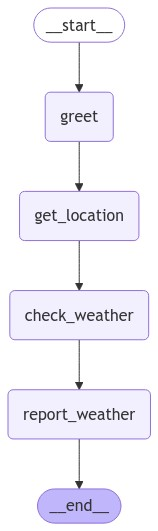

In [3]:
from IPython.display import Image, display

# Assuming you have already created and compiled your graph as 'app'
png_graph = app.get_graph().draw_mermaid_png()
display(Image(png_graph))